In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
from tensorflow.keras.models import load_model
raw_data=pd.read_excel('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/All_Data_Stitched.xlsx')
# save only the wanted columns before manipulating the data
columns_to_keep = ['Year', 'Month', 'Sunspots_Raw', 'Sunspots_Smoothed', 'Solar_Radio_Flux_at_10_7cm_Raw', 'Solar_Radio_Flux_at_10_7cm_Smoothed', 'THUL_Smoothed']
new_data = raw_data.loc[:, columns_to_keep]
# Assuming 'Year' and 'Month' are numeric columns in your DataFrame we use pandas datetime function
new_data['Date'] = pd.to_datetime(new_data[['Year', 'Month']].assign(day=1))

# Drop the 'Year' and 'Month' columns if you no longer need them
new_data.drop(['Year', 'Month'], axis=1, inplace=True)

# Now, the 'Date' column will be in a format that Python understands (YYYY-MM-DD)
print(new_data.head())

   Sunspots_Raw  Sunspots_Smoothed  Solar_Radio_Flux_at_10_7cm_Raw  \
0         339.0         307.177730                      268.554839   
1         286.7         293.783008                      243.454839   
2         233.6         279.224905                      199.664286   
3         270.0         266.924650                      249.193548   
4         277.6         259.102579                      247.543333   

   Solar_Radio_Flux_at_10_7cm_Smoothed  THUL_Smoothed       Date  
0                           250.235466     109.150977 1957-12-01  
1                           243.632957     108.891968 1958-01-01  
2                           237.835277     108.704364 1958-02-01  
3                           233.742530     108.616760 1958-03-01  
4                           231.608667     108.677512 1958-04-01  


In [ ]:
# we will begin the RNN prosses of data
target_variable = new_data['Sunspots_Smoothed']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the input features (excluding the 'Date' column)
input_features = new_data.drop(['Sunspots_Smoothed', 'Date'], axis=1)
scaled_input = scaler.fit_transform(input_features)

In [ ]:
window_size = 10

input_sequences = []
output_targets = []

for i in range(len(scaled_input) - window_size):
    input_sequences.append(scaled_input[i:i+window_size])
    output_targets.append(target_variable[i+window_size])


In [ ]:
# Convert the lists to arrays
input_sequences = np.array(input_sequences)
output_targets = np.array(output_targets)

# Split into train and test sets (e.g., 70% train, 30% test)
train_size = int(0.7 * len(input_sequences))
x_train, x_test = input_sequences[:train_size], input_sequences[train_size:]
y_train, y_test = output_targets[:train_size], output_targets[train_size:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(64, input_shape=(window_size, input_features.shape[1])))
model.add(Dense(1))  # Output layer with 1 neuron for regression


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.3)

Epoch 1/100
12/12 [==============================] - 1s 45ms/step - loss: 11250.0586 - val_loss: 9667.7793
Epoch 2/100
12/12 [==============================] - 1s 44ms/step - loss: 11120.8604 - val_loss: 9549.9004
Epoch 3/100
12/12 [==============================] - 1s 46ms/step - loss: 10998.7617 - val_loss: 9434.1113
Epoch 4/100
12/12 [==============================] - 0s 41ms/step - loss: 10877.3105 - val_loss: 9322.0166
Epoch 5/100
12/12 [==============================] - 0s 39ms/step - loss: 10761.2354 - val_loss: 9211.0205
Epoch 6/100
12/12 [==============================] - 0s 38ms/step - loss: 10644.1113 - val_loss: 9105.0137
Epoch 7/100
12/12 [==============================] - 1s 44ms/step - loss: 10531.2061 - val_loss: 9001.1865
Epoch 8/100
12/12 [==============================] - 0s 38ms/step - loss: 10420.5947 - val_loss: 8898.7549
Epoch 9/100
12/12 [==============================] - 1s 47ms/step - loss: 10313.9414 - val_loss: 8796.2148
Epoch 10/100
12/12 [=================

In [ ]:
loss = model.evaluate(x_test, y_test)
print("Test Loss:", loss)

8/8 [==============================] - 0s 4ms/step - loss: 294.8380
Test Loss: 294.8380126953125


In [ ]:
predictions = model.predict(x_test)


8/8 [==============================] - 1s 4ms/step


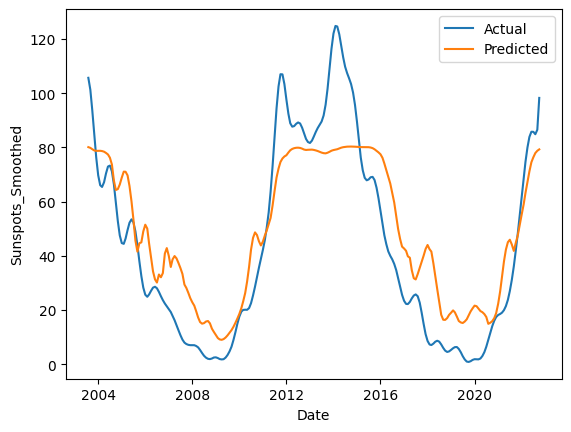

In [ ]:
plt.plot(new_data['Date'].iloc[-len(y_test):], y_test, label='Actual')
plt.plot(new_data['Date'].iloc[-len(y_test):], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Sunspots_Smoothed')
plt.legend()
plt.show()


In [ ]:
# -- using the RNN to predict the past values -- now we will make future prediction

Epoch 1/70
21/21 [==============================] - 31s 808ms/step - loss: 0.0336
Epoch 2/70
21/21 [==============================] - 21s 987ms/step - loss: 0.0085
Epoch 3/70
21/21 [==============================] - 17s 836ms/step - loss: 0.0064
Epoch 4/70
21/21 [==============================] - 16s 771ms/step - loss: 0.0057
Epoch 5/70
21/21 [==============================] - 18s 849ms/step - loss: 0.0049
Epoch 6/70
21/21 [==============================] - 19s 878ms/step - loss: 0.0051
Epoch 7/70
21/21 [==============================] - 17s 808ms/step - loss: 0.0047
Epoch 8/70
21/21 [==============================] - 17s 802ms/step - loss: 0.0044
Epoch 9/70
21/21 [==============================] - 17s 792ms/step - loss: 0.0043
Epoch 10/70
21/21 [==============================] - 18s 840ms/step - loss: 0.0036
Epoch 11/70
21/21 [==============================] - 18s 831ms/step - loss: 0.0032
Epoch 12/70
21/21 [==============================] - 17s 794ms/step - loss: 0.0037
Epoch 13/70
2

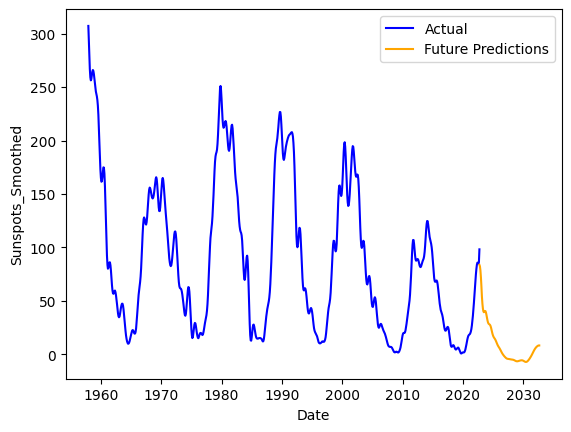

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout , Bidirectional

# Load the dataset
raw_data = pd.read_excel('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/All_Data_Stitched.xlsx')

# Data preprocessing
columns_to_keep = ['Year', 'Month', 'Sunspots_Smoothed']
new_data = raw_data.loc[:, columns_to_keep]
new_data['Date'] = pd.to_datetime(new_data[['Year', 'Month']].assign(day=1))
new_data.drop(['Year', 'Month'], axis=1, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_data[['Sunspots_Smoothed']])

# Define the window size
window_size = 120

# Create input sequences and target values
input_sequences = []
target_values = []
for i in range(len(scaled_data) - window_size):
    input_sequences.append(scaled_data[i : i + window_size])
    target_values.append(scaled_data[i + window_size])

input_sequences = np.array(input_sequences)
target_values = np.array(target_values)

# Split the data into training and test sets
train_size = int(0.8 * len(input_sequences))
train_input = input_sequences[:train_size]
train_target = target_values[:train_size]
test_input = input_sequences[train_size:]
test_target = target_values[train_size:]

# Build the model
model = Sequential()
model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True), input_shape=(window_size, 1)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(64, activation='tanh', return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(32, activation='relu')))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the combined dataset
model.fit(np.concatenate([train_input, test_input]), np.concatenate([train_target, test_target]), epochs=70, batch_size=32)

# Use the last 'window_size' data points from the original dataset as input for prediction
last_input_sequence = scaled_data[-window_size:]
last_input_sequence = last_input_sequence.reshape(1, window_size, 1)  # Reshape for the model input

future_predictions = []  # List to store the future predictions

for _ in range(120):
    prediction = model.predict(last_input_sequence)
    future_predictions.append(prediction[0, 0])  # Append the predicted value to the list

    # Update the input sequence for the next prediction
    last_input_sequence[0, :-1, :] = last_input_sequence[0, 1:, :]  # Shift data one step to the left
    last_input_sequence[0, -1, 0] = prediction[0, 0]  # Update the last element with the predicted value

# Inverse transform the scaled predictions to get the actual values
future_predictions = np.array(future_predictions).reshape(-1, 1)  # Convert to 2D array
future_predictions = scaler.inverse_transform(future_predictions).flatten()

# Get the last date in the original dataset
last_date = new_data['Date'].iloc[-1]

# Generate future dates for the next 120 months
future_dates = pd.date_range(start=last_date, periods=120, freq='MS')

# Plot actual data
plt.plot(new_data['Date'], new_data['Sunspots_Smoothed'], label='Actual', color='blue')

# Plot future predictions
plt.plot(future_dates, future_predictions, label='Future Predictions', color='orange')

plt.xlabel('Date')
plt.ylabel('Sunspots_Smoothed')
plt.legend()
plt.show()

model.save('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/model_3rd_COMPLICATED_good_solar.h5') # the window is set to 120 and is is
# a bidirectional RNN LSTM for better time stability


Epoch 1/70
20/20 [==============================] - 40s 1s/step - loss: 0.0344
Epoch 2/70
20/20 [==============================] - 29s 1s/step - loss: 0.0099
Epoch 3/70
20/20 [==============================] - 22s 1s/step - loss: 0.0060
Epoch 4/70
20/20 [==============================] - 21s 1s/step - loss: 0.0065
Epoch 5/70
20/20 [==============================] - 23s 1s/step - loss: 0.0048
Epoch 6/70
20/20 [==============================] - 21s 1s/step - loss: 0.0041
Epoch 7/70
20/20 [==============================] - 23s 1s/step - loss: 0.0042
Epoch 8/70
20/20 [==============================] - 23s 1s/step - loss: 0.0046
Epoch 9/70
20/20 [==============================] - 22s 1s/step - loss: 0.0041
Epoch 10/70
20/20 [==============================] - 22s 1s/step - loss: 0.0037
Epoch 11/70
20/20 [==============================] - 22s 1s/step - loss: 0.0033
Epoch 12/70
20/20 [==============================] - 21s 1s/step - loss: 0.0040
Epoch 13/70
20/20 [==============================

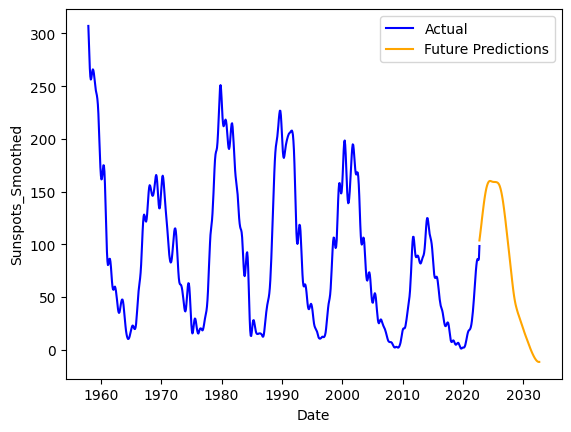

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout , Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
raw_data = pd.read_excel('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/All_Data_Stitched.xlsx')

# Data preprocessing
columns_to_keep = ['Year', 'Month', 'Sunspots_Smoothed']
new_data = raw_data.loc[:, columns_to_keep]
new_data['Date'] = pd.to_datetime(new_data[['Year', 'Month']].assign(day=1))
new_data.drop(['Year', 'Month'], axis=1, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_data[['Sunspots_Smoothed']])

# Define the window size
window_size = 160

# Create input sequences and target values
input_sequences = []
target_values = []
for i in range(len(scaled_data) - window_size):
    input_sequences.append(scaled_data[i : i + window_size])
    target_values.append(scaled_data[i + window_size])

input_sequences = np.array(input_sequences)
target_values = np.array(target_values)

# Split the data into training and test sets
train_size = int(0.8 * len(input_sequences))
train_input = input_sequences[:train_size]
train_target = target_values[:train_size]
test_input = input_sequences[train_size:]
test_target = target_values[train_size:]

# Build the model
model = Sequential()
model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True), input_shape=(window_size, 1)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(64, activation='tanh', return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(32, activation='relu')))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the combined dataset
early_stopping = EarlyStopping(monitor='loss', patience=7, restore_best_weights=True)
model.fit(np.concatenate([train_input, test_input]), np.concatenate([train_target, test_target]), epochs=70, batch_size=32, callbacks=[early_stopping])

# Use the last 'window_size' data points from the original dataset as input for prediction
last_input_sequence = scaled_data[-window_size:]
last_input_sequence = last_input_sequence.reshape(1, window_size, 1)  # Reshape for the model input

future_predictions = []  # List to store the future predictions

for _ in range(120):
    prediction = model.predict(last_input_sequence)
    future_predictions.append(prediction[0, 0])  # Append the predicted value to the list

    # Update the input sequence for the next prediction
    last_input_sequence[0, :-1, :] = last_input_sequence[0, 1:, :]  # Shift data one step to the left
    last_input_sequence[0, -1, 0] = prediction[0, 0]  # Update the last element with the predicted value

# Inverse transform the scaled predictions to get the actual values
future_predictions = np.array(future_predictions).reshape(-1, 1)  # Convert to 2D array
future_predictions = scaler.inverse_transform(future_predictions).flatten()

# Get the last date in the original dataset
last_date = new_data['Date'].iloc[-1]

# Generate future dates for the next 120 months
future_dates = pd.date_range(start=last_date, periods=120, freq='MS')

# Plot actual data
plt.plot(new_data['Date'], new_data['Sunspots_Smoothed'], label='Actual', color='blue')

# Plot future predictions
plt.plot(future_dates, future_predictions, label='Future Predictions', color='orange')

plt.xlabel('Date')
plt.ylabel('Sunspots_Smoothed')
plt.legend()
plt.show()

model.save('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/model_4rth_COMPLICATED_good_solar.h5') # the window is set to 160 and a bidirectional
# RNN with early stoping for loss as a metric

Epoch 1/70
19/19 [==============================] - 39s 1s/step - loss: 0.0455
Epoch 2/70
19/19 [==============================] - 25s 1s/step - loss: 0.0099
Epoch 3/70
19/19 [==============================] - 25s 1s/step - loss: 0.0066
Epoch 4/70
19/19 [==============================] - 26s 1s/step - loss: 0.0061
Epoch 5/70
19/19 [==============================] - 26s 1s/step - loss: 0.0053
Epoch 6/70
19/19 [==============================] - 26s 1s/step - loss: 0.0050
Epoch 7/70
19/19 [==============================] - 28s 1s/step - loss: 0.0049
Epoch 8/70
19/19 [==============================] - 26s 1s/step - loss: 0.0048
Epoch 9/70
19/19 [==============================] - 27s 1s/step - loss: 0.0057
Epoch 10/70
19/19 [==============================] - 25s 1s/step - loss: 0.0047
Epoch 11/70
19/19 [==============================] - 26s 1s/step - loss: 0.0045
Epoch 12/70
19/19 [==============================] - 26s 1s/step - loss: 0.0041
Epoch 13/70
19/19 [==============================

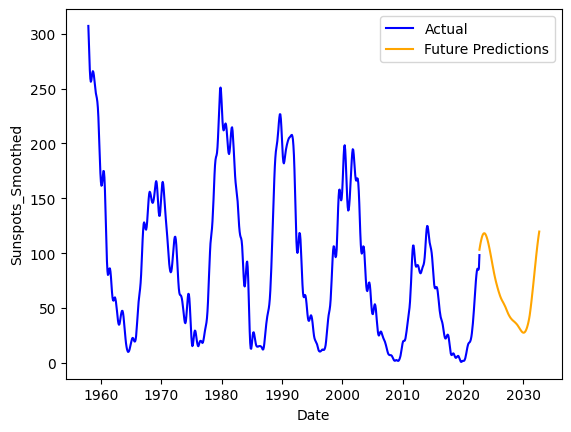

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout , Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
raw_data = pd.read_excel('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/All_Data_Stitched.xlsx')

# Data preprocessing
columns_to_keep = ['Year', 'Month', 'Sunspots_Smoothed']
new_data = raw_data.loc[:, columns_to_keep]
new_data['Date'] = pd.to_datetime(new_data[['Year', 'Month']].assign(day=1))
new_data.drop(['Year', 'Month'], axis=1, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_data[['Sunspots_Smoothed']])

# Define the window size
window_size = 200

# Create input sequences and target values
input_sequences = []
target_values = []
for i in range(len(scaled_data) - window_size):
    input_sequences.append(scaled_data[i : i + window_size])
    target_values.append(scaled_data[i + window_size])

input_sequences = np.array(input_sequences)
target_values = np.array(target_values)

# Split the data into training and test sets
train_size = int(0.8 * len(input_sequences))
train_input = input_sequences[:train_size]
train_target = target_values[:train_size]
test_input = input_sequences[train_size:]
test_target = target_values[train_size:]

# Build the model
model = Sequential()
model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True), input_shape=(window_size, 1)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(64, activation='tanh', return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(32, activation='relu')))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the combined dataset
early_stopping = EarlyStopping(monitor='loss', patience=7, restore_best_weights=True)
model.fit(np.concatenate([train_input, test_input]), np.concatenate([train_target, test_target]), epochs=70, batch_size=32, callbacks=[early_stopping])

# Use the last 'window_size' data points from the original dataset as input for prediction
last_input_sequence = scaled_data[-window_size:]
last_input_sequence = last_input_sequence.reshape(1, window_size, 1)  # Reshape for the model input

future_predictions = []  # List to store the future predictions

for _ in range(120):
    prediction = model.predict(last_input_sequence)
    future_predictions.append(prediction[0, 0])  # Append the predicted value to the list

    # Update the input sequence for the next prediction
    last_input_sequence[0, :-1, :] = last_input_sequence[0, 1:, :]  # Shift data one step to the left
    last_input_sequence[0, -1, 0] = prediction[0, 0]  # Update the last element with the predicted value

# Inverse transform the scaled predictions to get the actual values
future_predictions = np.array(future_predictions).reshape(-1, 1)  # Convert to 2D array
future_predictions = scaler.inverse_transform(future_predictions).flatten()

# Get the last date in the original dataset
last_date = new_data['Date'].iloc[-1]

# Generate future dates for the next 120 months
future_dates = pd.date_range(start=last_date, periods=120, freq='MS')

# Plot actual data
plt.plot(new_data['Date'], new_data['Sunspots_Smoothed'], label='Actual', color='blue')

# Plot future predictions
plt.plot(future_dates, future_predictions, label='Future Predictions', color='orange')

plt.xlabel('Date')
plt.ylabel('Sunspots_Smoothed')
plt.legend()
plt.show()

model.save('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/model_5th_COMPLICATED_good_solar.h5') # the window is set to 200 and a bidirectional
# RNN with early stoping for loss as a metric

1/1 [==============================] - 0s 63ms/step


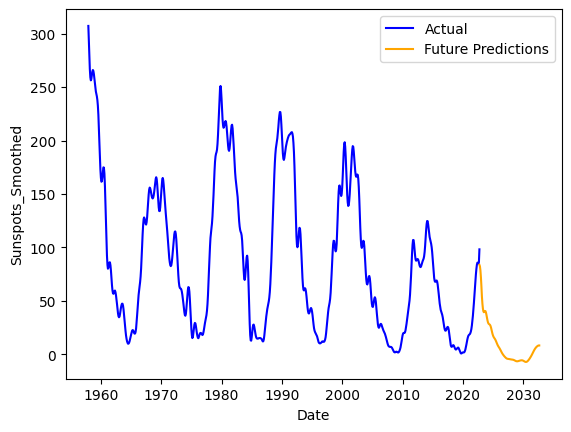

In [ ]:
# SCRIPT THAT ONLY PLOTS THE PREDICTION !!!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
raw_data = pd.read_excel('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/All_Data_Stitched.xlsx')

# Data preprocessing
columns_to_keep = ['Year', 'Month', 'Sunspots_Smoothed']
new_data = raw_data.loc[:, columns_to_keep]
new_data['Date'] = pd.to_datetime(new_data[['Year', 'Month']].assign(day=1))
new_data.drop(['Year', 'Month'], axis=1, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_data[['Sunspots_Smoothed']])

# Define the window size
window_size = 120

# Use the last 'window_size' data points from the original dataset as input for prediction
last_input_sequence = scaled_data[-window_size:]
last_input_sequence = last_input_sequence.reshape(1, window_size, 1)  # Reshape for the model input

future_predictions = []  # List to store the future predictions

# load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/model_3rd_COMPLICATED_good_solar.h5')

for _ in range(120):
    prediction = model.predict(last_input_sequence)
    future_predictions.append(prediction[0, 0])  # Append the predicted value to the list

    # Update the input sequence for the next prediction
    last_input_sequence[0, :-1, :] = last_input_sequence[0, 1:, :]  # Shift data one step to the left
    last_input_sequence[0, -1, 0] = prediction[0, 0]  # Update the last element with the predicted value

# Inverse transform the scaled predictions to get the actual values
future_predictions = np.array(future_predictions).reshape(-1, 1)  # Convert to 2D array
future_predictions = scaler.inverse_transform(future_predictions).flatten()

# Get the last date in the original dataset
last_date = new_data['Date'].iloc[-1]

# Generate future dates for the next 120 months
future_dates = pd.date_range(start=last_date, periods=120, freq='MS')

# Plot actual data
plt.plot(new_data['Date'], new_data['Sunspots_Smoothed'], label='Actual', color='blue')

# Plot future predictions
plt.plot(future_dates, future_predictions, label='Future Predictions', color='orange')

plt.xlabel('Date')
plt.ylabel('Sunspots_Smoothed')
plt.legend()
plt.show()
